In [1]:
%pip install -q nltk twython textblob wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
!unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [34]:
#import library 
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [4]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

TEXT PREPOCESSING

In [5]:
df = pd.read_csv("C:/Users/umam/Desktop/Sentiment Analysis Using Logistic Regression and Random Forest/Dataset/amazon_reviews.csv")
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,5.00,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",Works in a HTC Rezound. Was running short of ...,5.00,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",5.00,works great,1381449600,2013-11-10,393,0,0


In [6]:
#convert to lowercase
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText']

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

In [7]:
#delete unnecessary character
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '', regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

In [8]:
#delete number 
df['reviewText'] = df['reviewText'].str.replace('\d', '', regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

In [9]:
#delete stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\umam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [12]:
#delete rarewords
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
sharper          1
cheapos          1
gate             1
measuring        1
stealwould       1
Name: count, Length: 9701, dtype: int64

In [13]:
drops = temp_df[temp_df <= 1]
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [14]:
temp_df_1 = pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df_1

card            4603
gb              1725
phone           1685
works           1559
great           1445
                ... 
itupdate           2
intermittant       2
pennies            2
suffer             2
chkdsk             2
Name: count, Length: 4089, dtype: int64

TOKENIZATION

In [15]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\umam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

LEMMATIZATION

In [17]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\umam\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\umam\AppData\Roaming\nltk_data...


True

In [18]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewText']

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

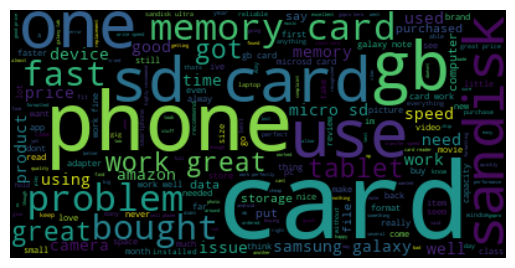

In [19]:
text = " ".join(i for i in df.reviewText)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

SENTIMENT ANALYSIS

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\umam\AppData\Roaming\nltk_data...


True

In [21]:
sentimen = SentimentIntensityAnalyzer()
df['reviewText'][0:10].apply(lambda x: sentimen.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
3    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...
4    {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co...
7    {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [22]:
df["reviewText"][0:10].apply(lambda x: sentimen.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [23]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sentimen.polarity_scores(x)["compound"])
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else supposed pur...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0,0.87
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,0.82
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound running short space gb sandis...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,0.00
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0,0.92


FEATURE ENGINEERING

In [25]:
df["reviewText"][0:10].apply(lambda x: "pos" if sentimen.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [27]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sentimen.polarity_scores(x)["compound"] > 0 else "neg")
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else supposed pur...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00,neg
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0,0.87,pos
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,0.82,pos
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound running short space gb sandis...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,0.00,neg
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0,0.92,pos


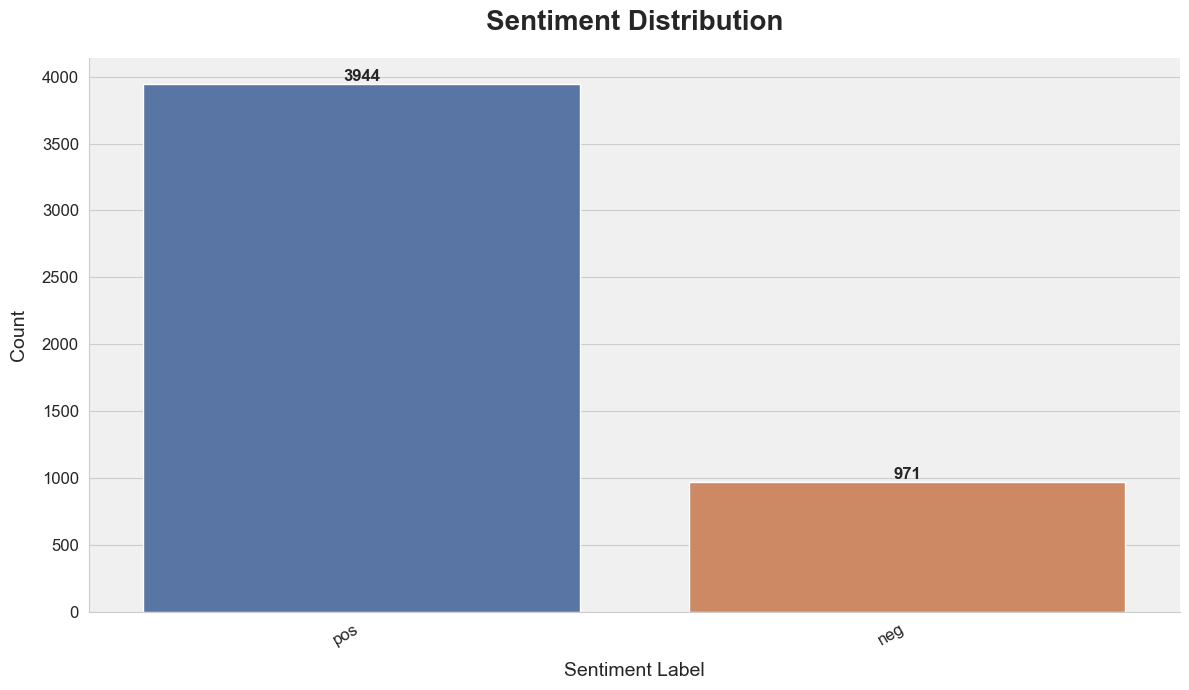

In [39]:
sentiment_counts = df["sentiment_label"].value_counts()

# style and color palette
sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Customize the plot
plt.title('Sentiment Distribution', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Sentiment Label', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(sentiment_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Improve layout and remove top and right spines
plt.tight_layout()
sns.despine(top=True, right=True)

# Add a subtle background color
ax.set_facecolor('#f0f0f0')
# Show the plot
plt.show()

In [41]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,1
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else supposed pur...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0,0.87,1
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,0.82,1
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound running short space gb sandis...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,0.00,0
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0,0.92,1


In [42]:
y = df["sentiment_label"] # dependent variable
X = df["reviewText"] # independent variable